# **Credit Card Fraud Detection**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

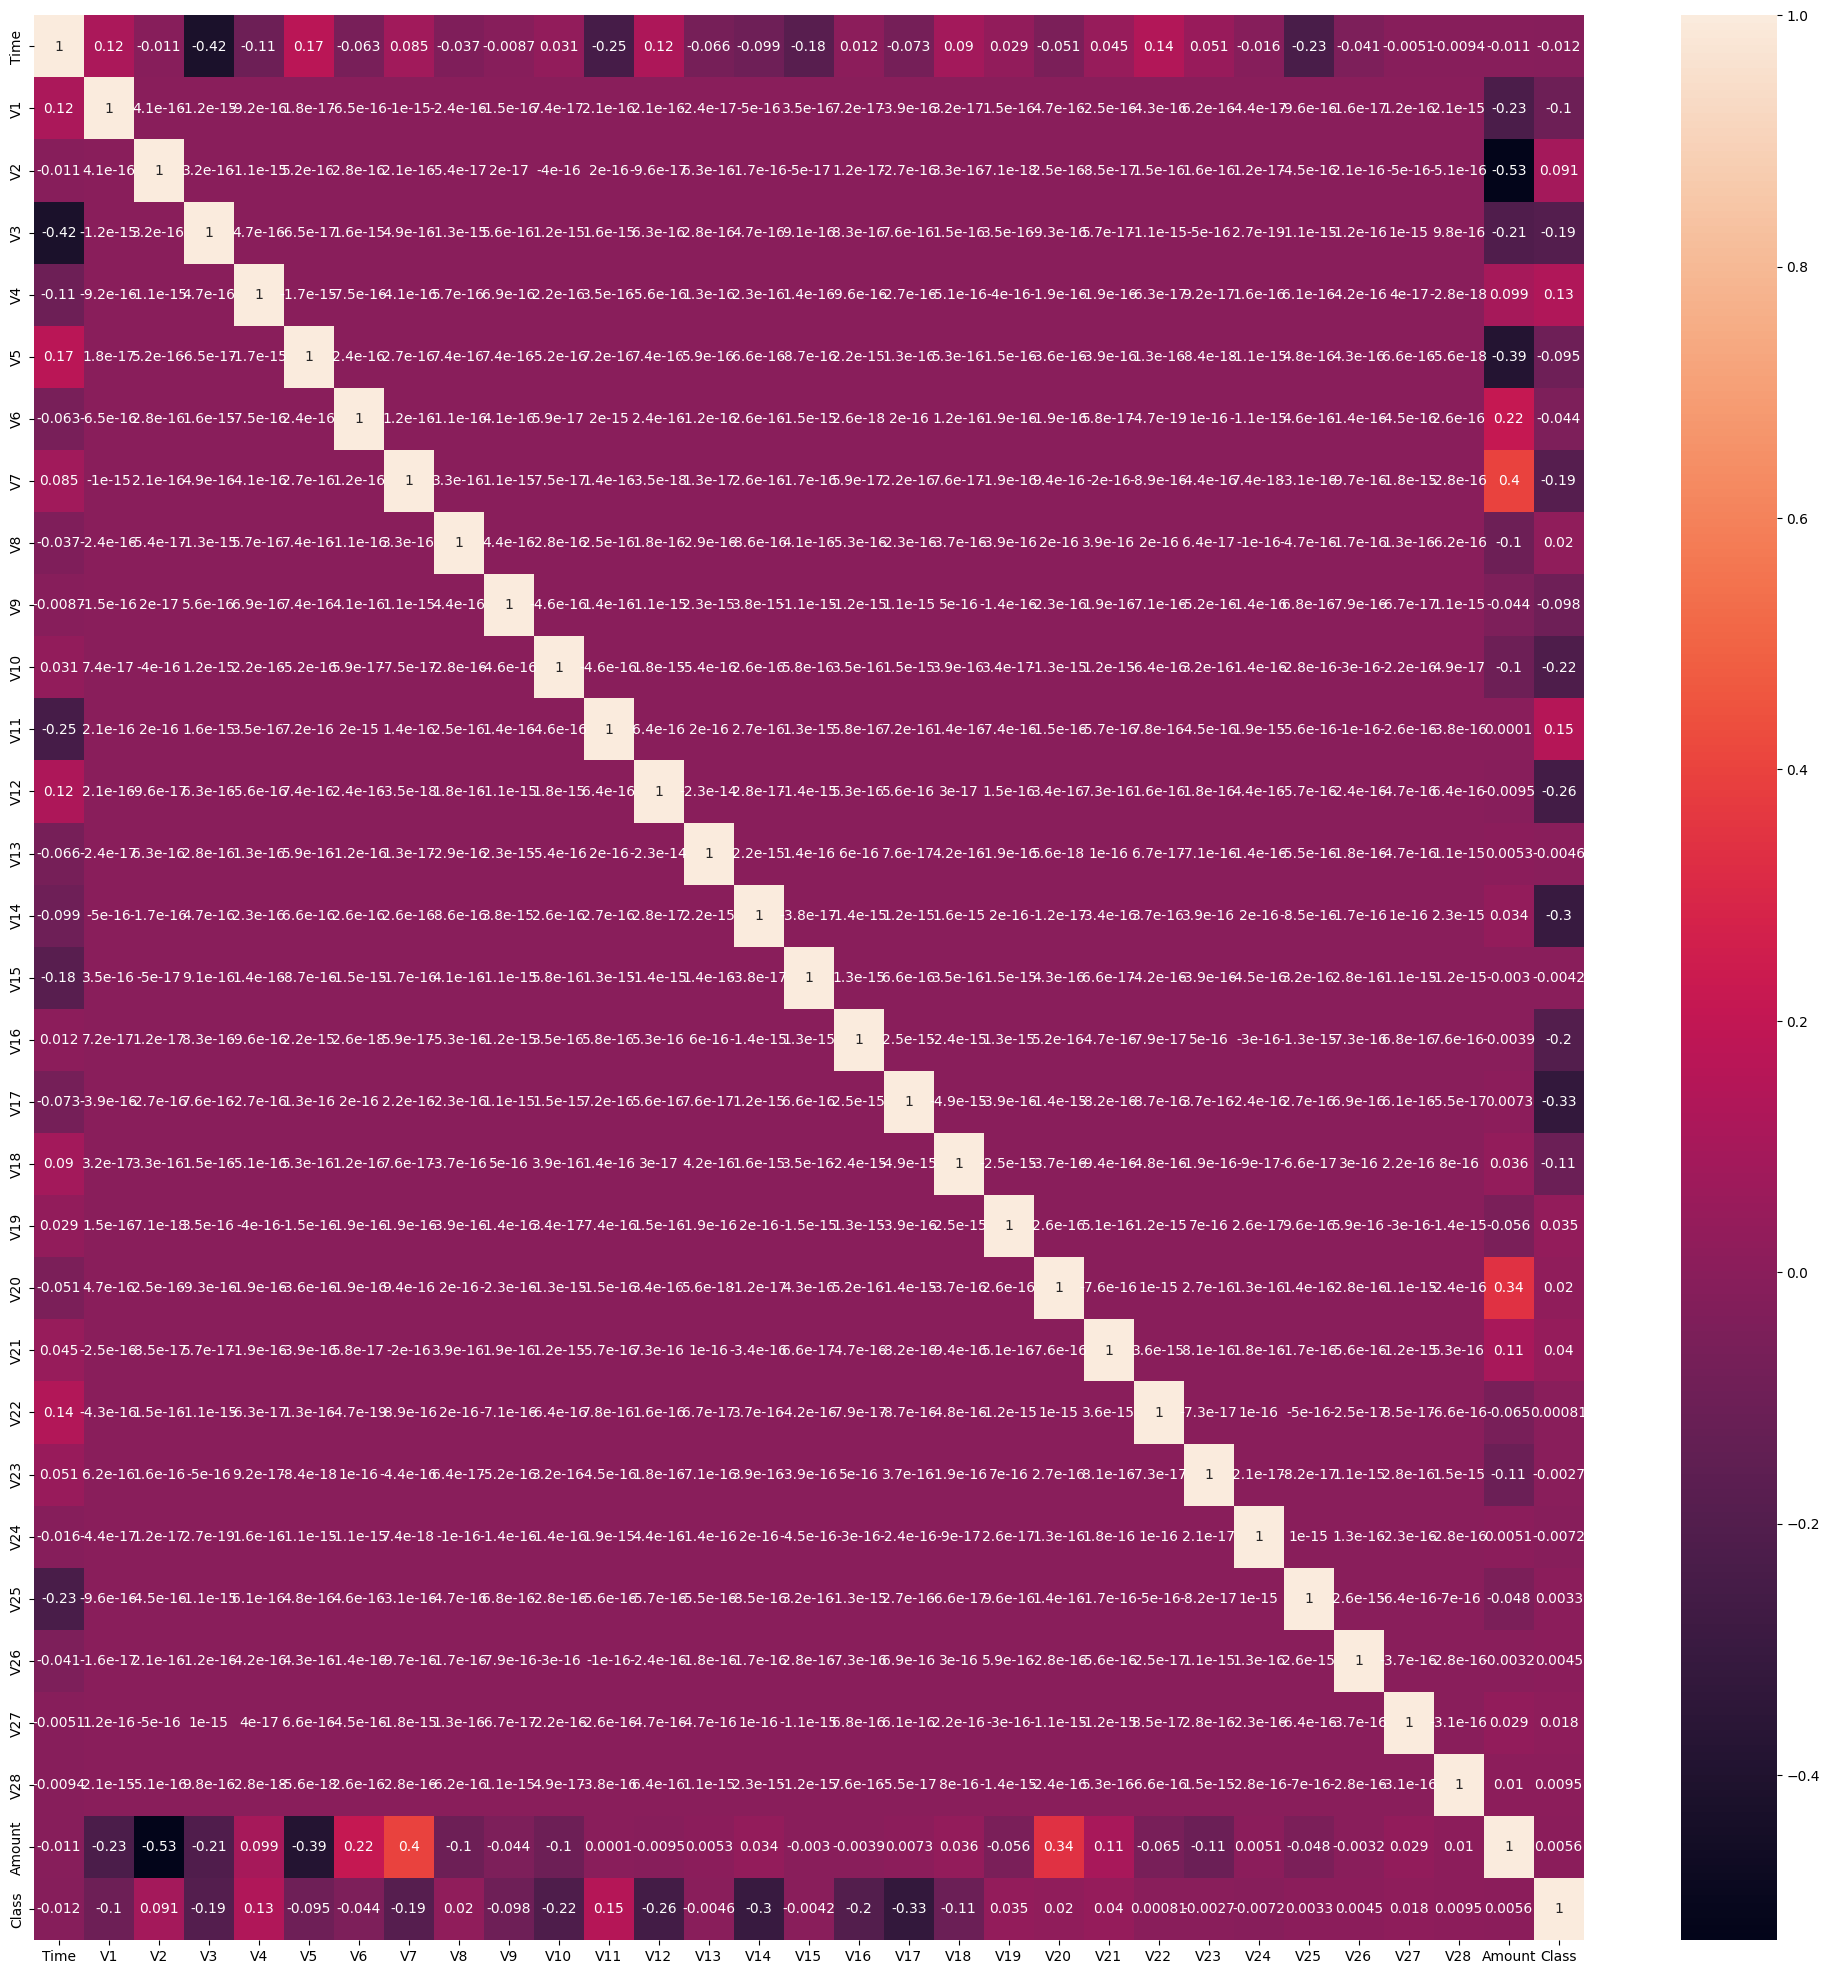

In [12]:
correlation = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True)

Without knowing the context of V1-V28 columns we are uncertain to use them as independent variables here for this prediction model. We will use 'Time' and 'Amount' as independent variables here and 'Class' as dependent variable.

In [59]:
from sklearn.linear_model import LogisticRegression

In [45]:
X = df[['Time','Amount']]
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 0.78617888 -0.15654658]
 [ 1.44713595 -0.12719917]
 [-0.44974958 -0.34302161]
 ...
 [-1.25099132 -0.18383174]
 [ 0.49482973 -0.31914709]
 [ 1.19532674  0.29024789]]


Model Fitting

In [47]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


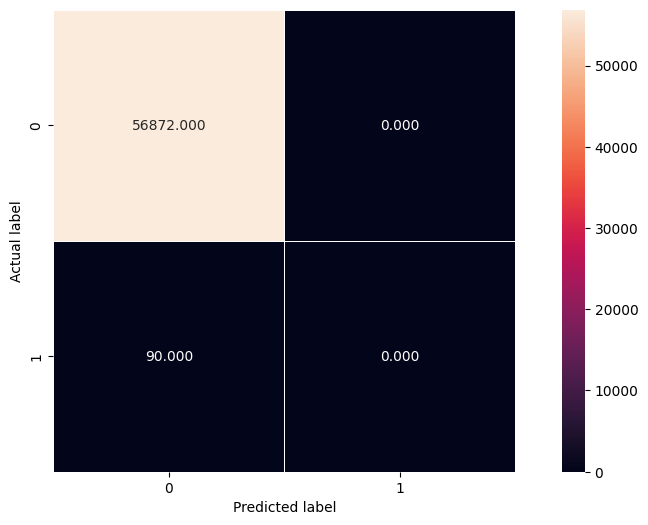

In [48]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [49]:
print("Accuracy: ", accuracy_score(y_test,predictions)*100)

Accuracy:  99.84199992977774


## We will also use Random Forest classification here for the prediction.

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

<ipython-input-54-8edb97122eb3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

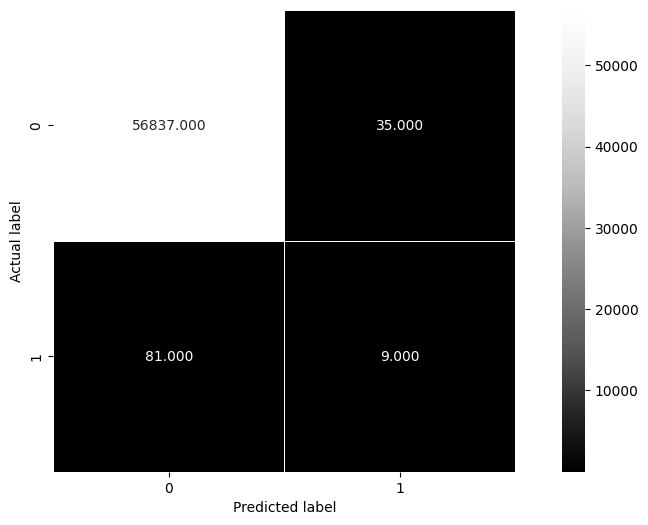

In [60]:
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greys_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [57]:
print("Accuracy: ", accuracy_score(y_test,predictions)*100)

Accuracy:  99.79635546504687


# **Conclusion**
I consider Random Forest classifier as better a prediction model here as it is also calculating the number true negatives although both the models yield high accuracy rate but in my opinion Random Forest is the best fit here.